# ECE 43800: Laboratory 2 -- Image Processing Basics<br/>
## Name: Jin Hyung Park
## Section: 003

# 1. Introduction

The lab for Week 2 will cover the basics of image processsing, including: fundamentals of digital monochrome images, intensity histograms, pointwise transformations, gamma correction, and fundamentals of digital color images.

Before moving on, be sure to run the cells below to import all the necessary libraries.

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# refer to https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

# 2. Introduction to Monochrome Images
An image is the optical representation of objects illuminated by a light source. Since we want to process images using a computer, we represent them as functions of discrete spatial variables. For monochrome (black-and-white) images, a scalar function $f[i,j]$ can be used to represent the light intensity at each spatial coordinate $(i,j)$. Figure 1 illustrates the convention that we will use for spatial coordinates in this lab.

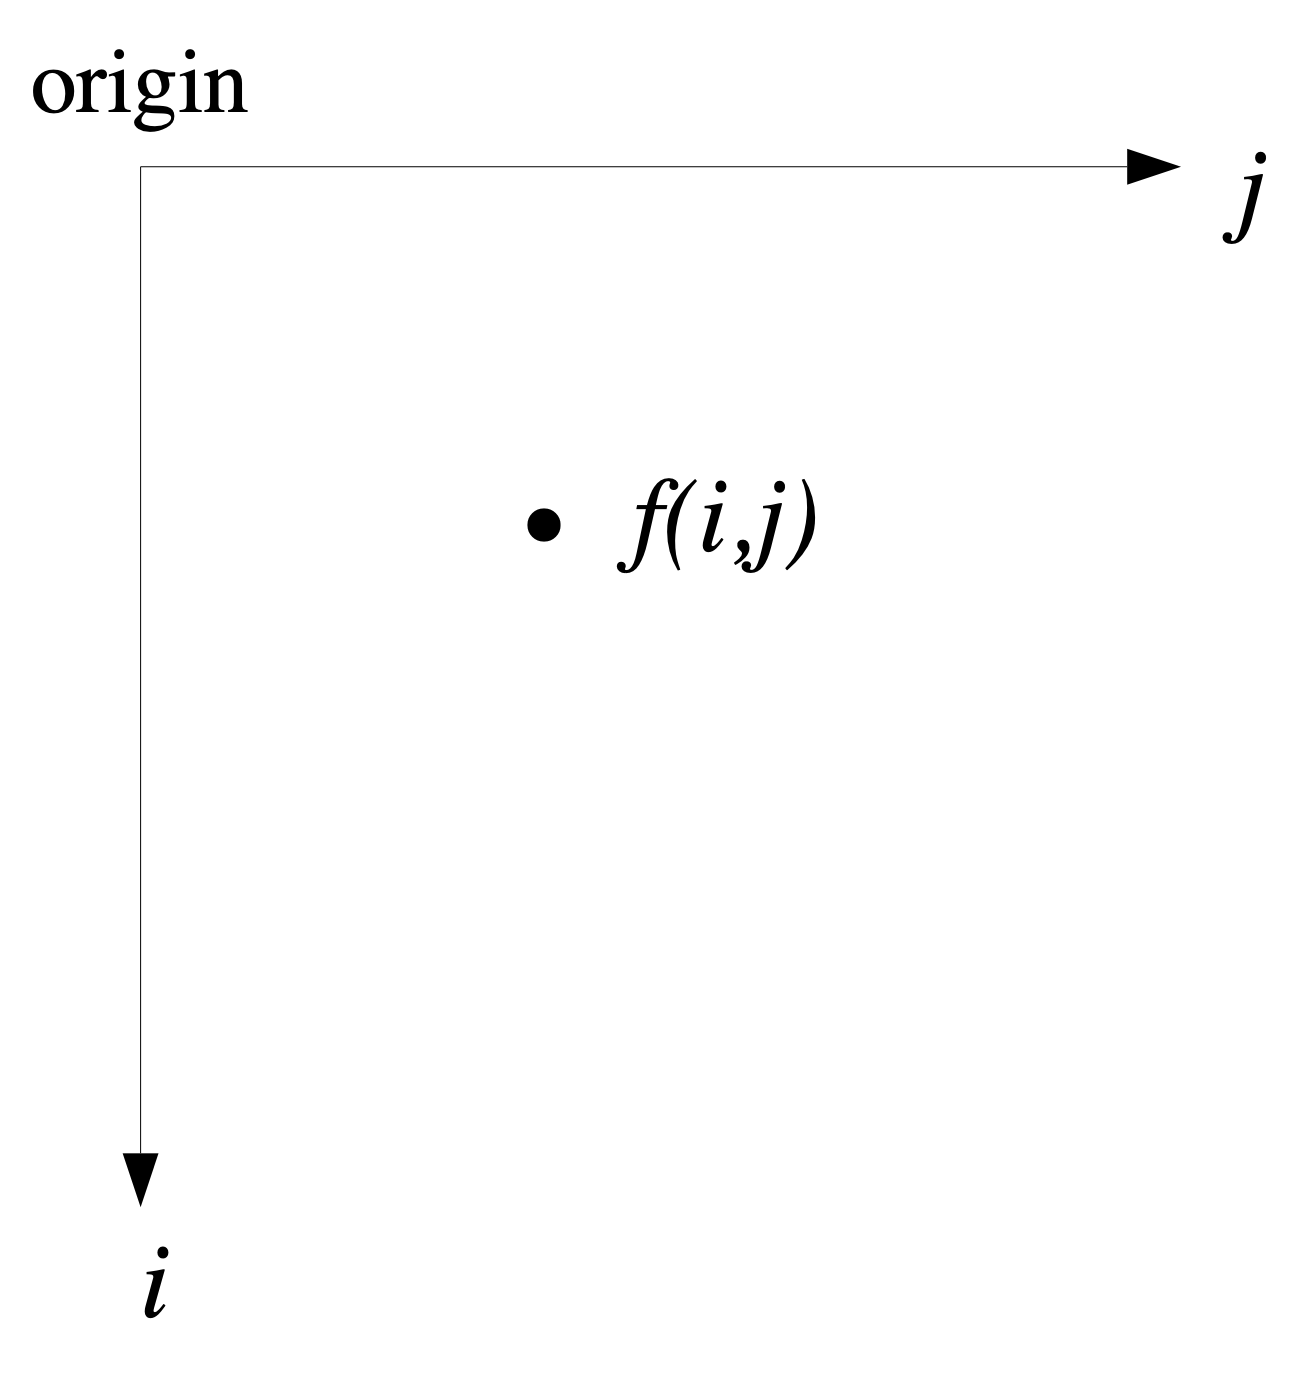
    
Figure 1: Spatial coordinates used in digital image representation

If we assume the coordinates to be a set of positive integers, e.g. $i = 0, \ldots, M-1$ and $j = 0, \ldots, N-1$, then an image can be coveniently represented by a matrix of the form
$$f[i,j] = \begin{bmatrix}
    f[0,0] & f[0,1] & \cdots & f[0,N-1] \\
    f[1,0] & f[1,1] & \cdots & f[1,N-1] \\
    \vdots & \vdots & \ddots & \vdots \\
    f[M-1,0] & f[M-1,1] & \cdots & f[M-1,N-1]
\end{bmatrix}$$

We call this an $M \times N$ image, and the elements of the matrix are known as *pixels*. The pixels in a digital image usually take on integer values in the finite range $0 \leq f[i,j] \leq L_\text{max}$, where $0$ represents the minimum intensity value (black) and $L_\text{max}$ is the maximum intensity value (white) that the digital image can take on. The interval $[0, L_\text{max}]$ is known as a gray scale.

In this lab, we will concentrate on 8-bit images, meaning that each pixel is represented by a single byte. Since a byte can take on 256 distinct values, $L_\text{max}$ is 255 for an 8-bit image.

## 2.1 Exercise: Numerical Representation of Images

To process images in Python, we need to first understand their numerical representation.

**1. Load the image file ```yacht.tif```, which contains an $8$-bit monochrome image, using [`plt.imread()`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imread.html).**

In [4]:
# insert your code here
image1 = plt.imread("yacht.tif")

**2. Display the type of this variable by printing its attribute [`dtype`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dtype.html).**

In [5]:
# insert your code here
image1.dtype

dtype('uint8')

Notice that the $A$ matrix elements are of type `uint8` (unsigned integer, 8 bits). This means that Python is using a single byte to represent each pixel. We must be careful that we do not perform numerical computation on numbers of type `uint8` to avoid overlow. Often, we convert the matrix to a floating point representation before computation using the method `np.astype`.

**3. Create a double precision representation of the image. Display the type of the matrix.**

In [6]:
# insert your code here
type_image1 = image1.astype(float)
type_image1.dtype

dtype('float64')

In future sections, we will be performing computations on our images, where we will need to remember to convert them to type `double` before processing them.

**4. Display ```yacht.tif``` using the following commands:**
```python
plt.imshow(B, cmap='gray', vmin=0, vmax=255)
plt.show()
```

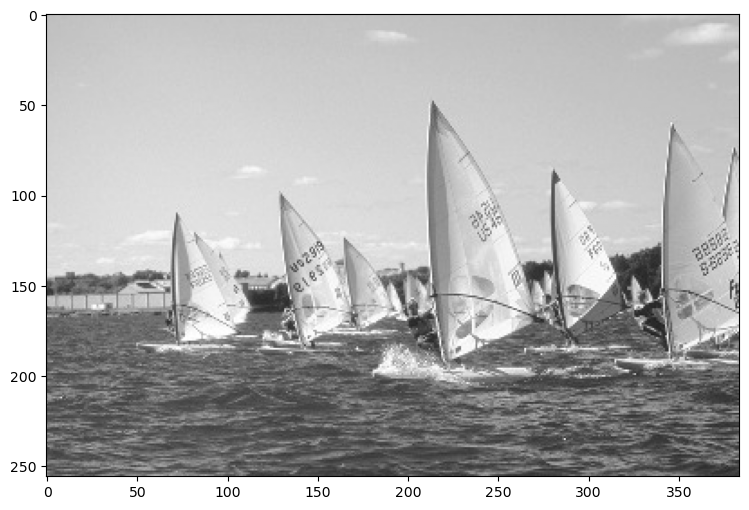

In [7]:
# insert your code here
plt.imshow(image1, cmap='gray', vmin=0, vmax=255)
plt.show()

The `plt.imshow` command works for both type `uint8` and `double` images. The `cmap` argument specifies the color palette and range for how the image is displayed, while `vmin` and `vmax` describe the minimum and maximum pixel values. It is important to note that if any pixel values are outside the range `vmin` to `vmax` after processing, then those values will be clipped to `vmin` or `vmax` respectively in the displayed image. **It is necessary to set `vmin=0` and `vmax=255` to display a grayscale image properly. Without setting these two arguments, the `imshow` function tends to normalize the input matrix first, thus displaying an incorrect grayscale image.**

It is also important to note that a floating point pixel value will be rounded down (floored) to an integer before it is display. Therefore, the maximum number of gray levels that will be displayed on the monitor is 255, even if the image values take on a continuous range.

Now, we will practice some simple operations on the `yacht.tif` image.

**5. Print the value of $f[35, 79]$ for this `yacht.tif` image.**

In [8]:
# insert your code here
image1[35,79]

np.uint8(207)

**6. Downsample this image by selecting every other row and column. Then, display it.**

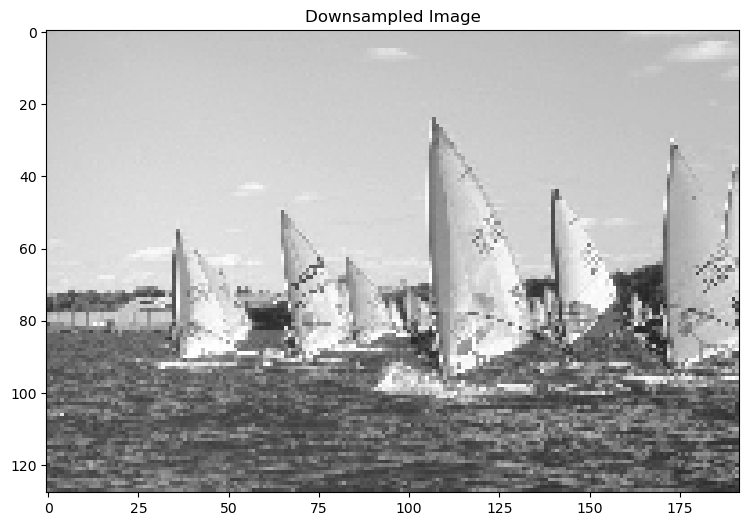

In [9]:
# insert your code here
down_sample = image1[::2, ::2]
plt.imshow(down_sample, cmap='gray', vmin=0, vmax=255)
plt.title("Downsampled Image")
plt.show()

**7.  Make a horizontally flipped version of the image by reversing the order of each column. Then, display it.**

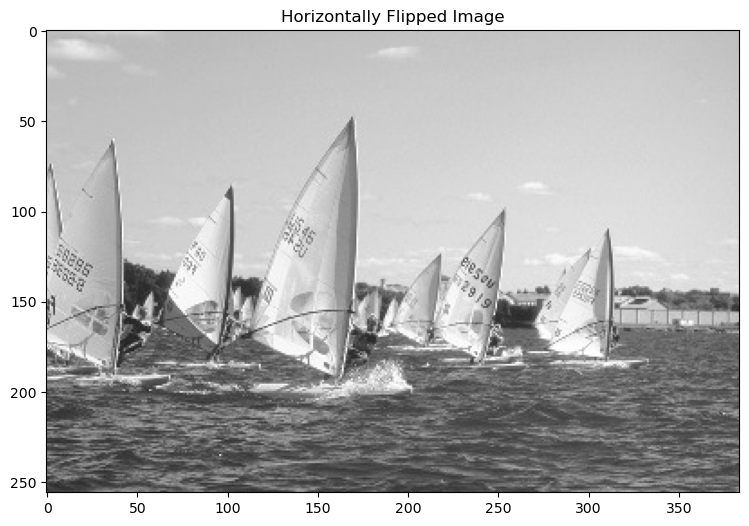

In [10]:
# insert your code here
horizon_flip = image1[:, ::-1]
plt.imshow(horizon_flip, cmap='gray', vmin=0, vmax=255)
plt.title("Horizontally Flipped Image")
plt.show()

**8. Similarly, create a vertically flipped image. Display it.**

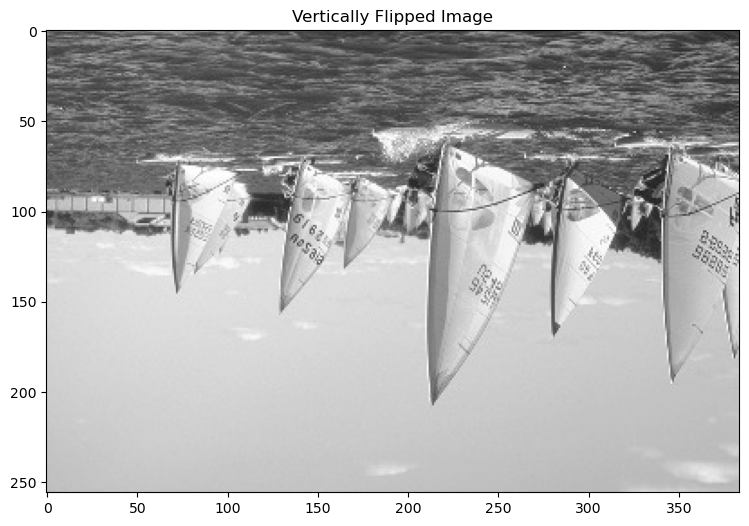

In [11]:
# insert your code here
vertical_flip = image1[::-1, :]
plt.imshow(vertical_flip, cmap='gray', vmin=0, vmax=255)
plt.title("Vertically Flipped Image")
plt.show()

**9. Create a “negative” of the image by subtracting each pixel from $255$. Then, display it.** 

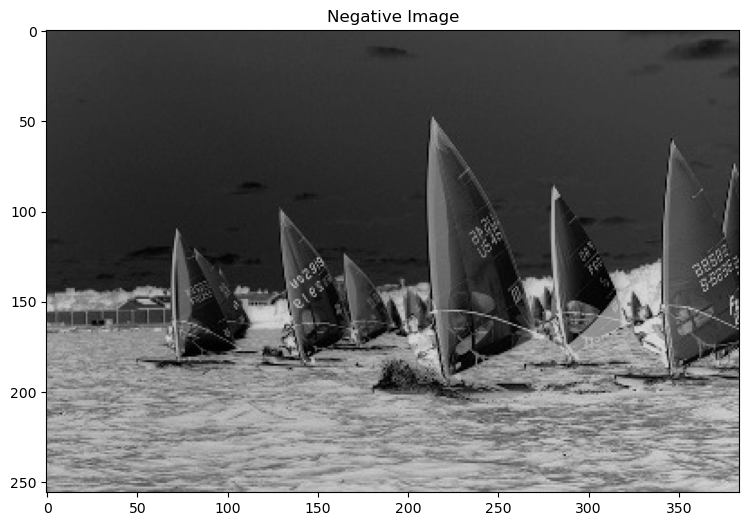

In [12]:
# insert your code here
neg_image = np.subtract(255, image1)
plt.imshow(neg_image, cmap='gray', vmin=0, vmax=255)
plt.title("Negative Image")
plt.show()

**10. Multiply each pixel of the original image by $1.5$. Display it.**

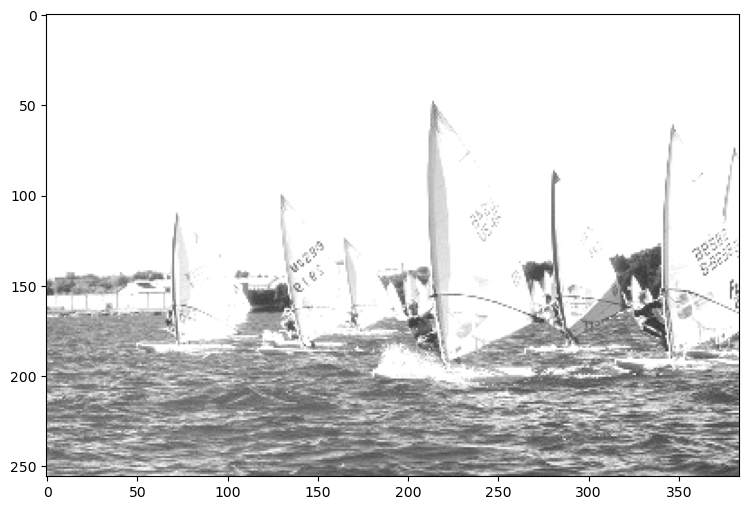

In [13]:
# insert your code here
mul_image = np.multiply(image1, 1.5)
plt.imshow(mul_image, cmap='gray', vmin=0, vmax=255)
plt.show()

**11.  What effect did multiplying each pixel of the original image by $1.5$ have?**

The image becomes much brighter than the original. This makes sense because each grayscale pixel value is scaled by 1.5, pushing many values closer to the maximum intensity of 255, which corresponds to the brightest level.

# 3. Pixel Distributions

## 3.1 Histogram of an Image

The histogram of a digital image shows how its pixel intensities are distributed. The pixel intensities vary along the horizontal axis, and the number of pixels at each intensity is plotted vertically, usually as a bar graph. A typical histogram of an 8-bit image is shown below.

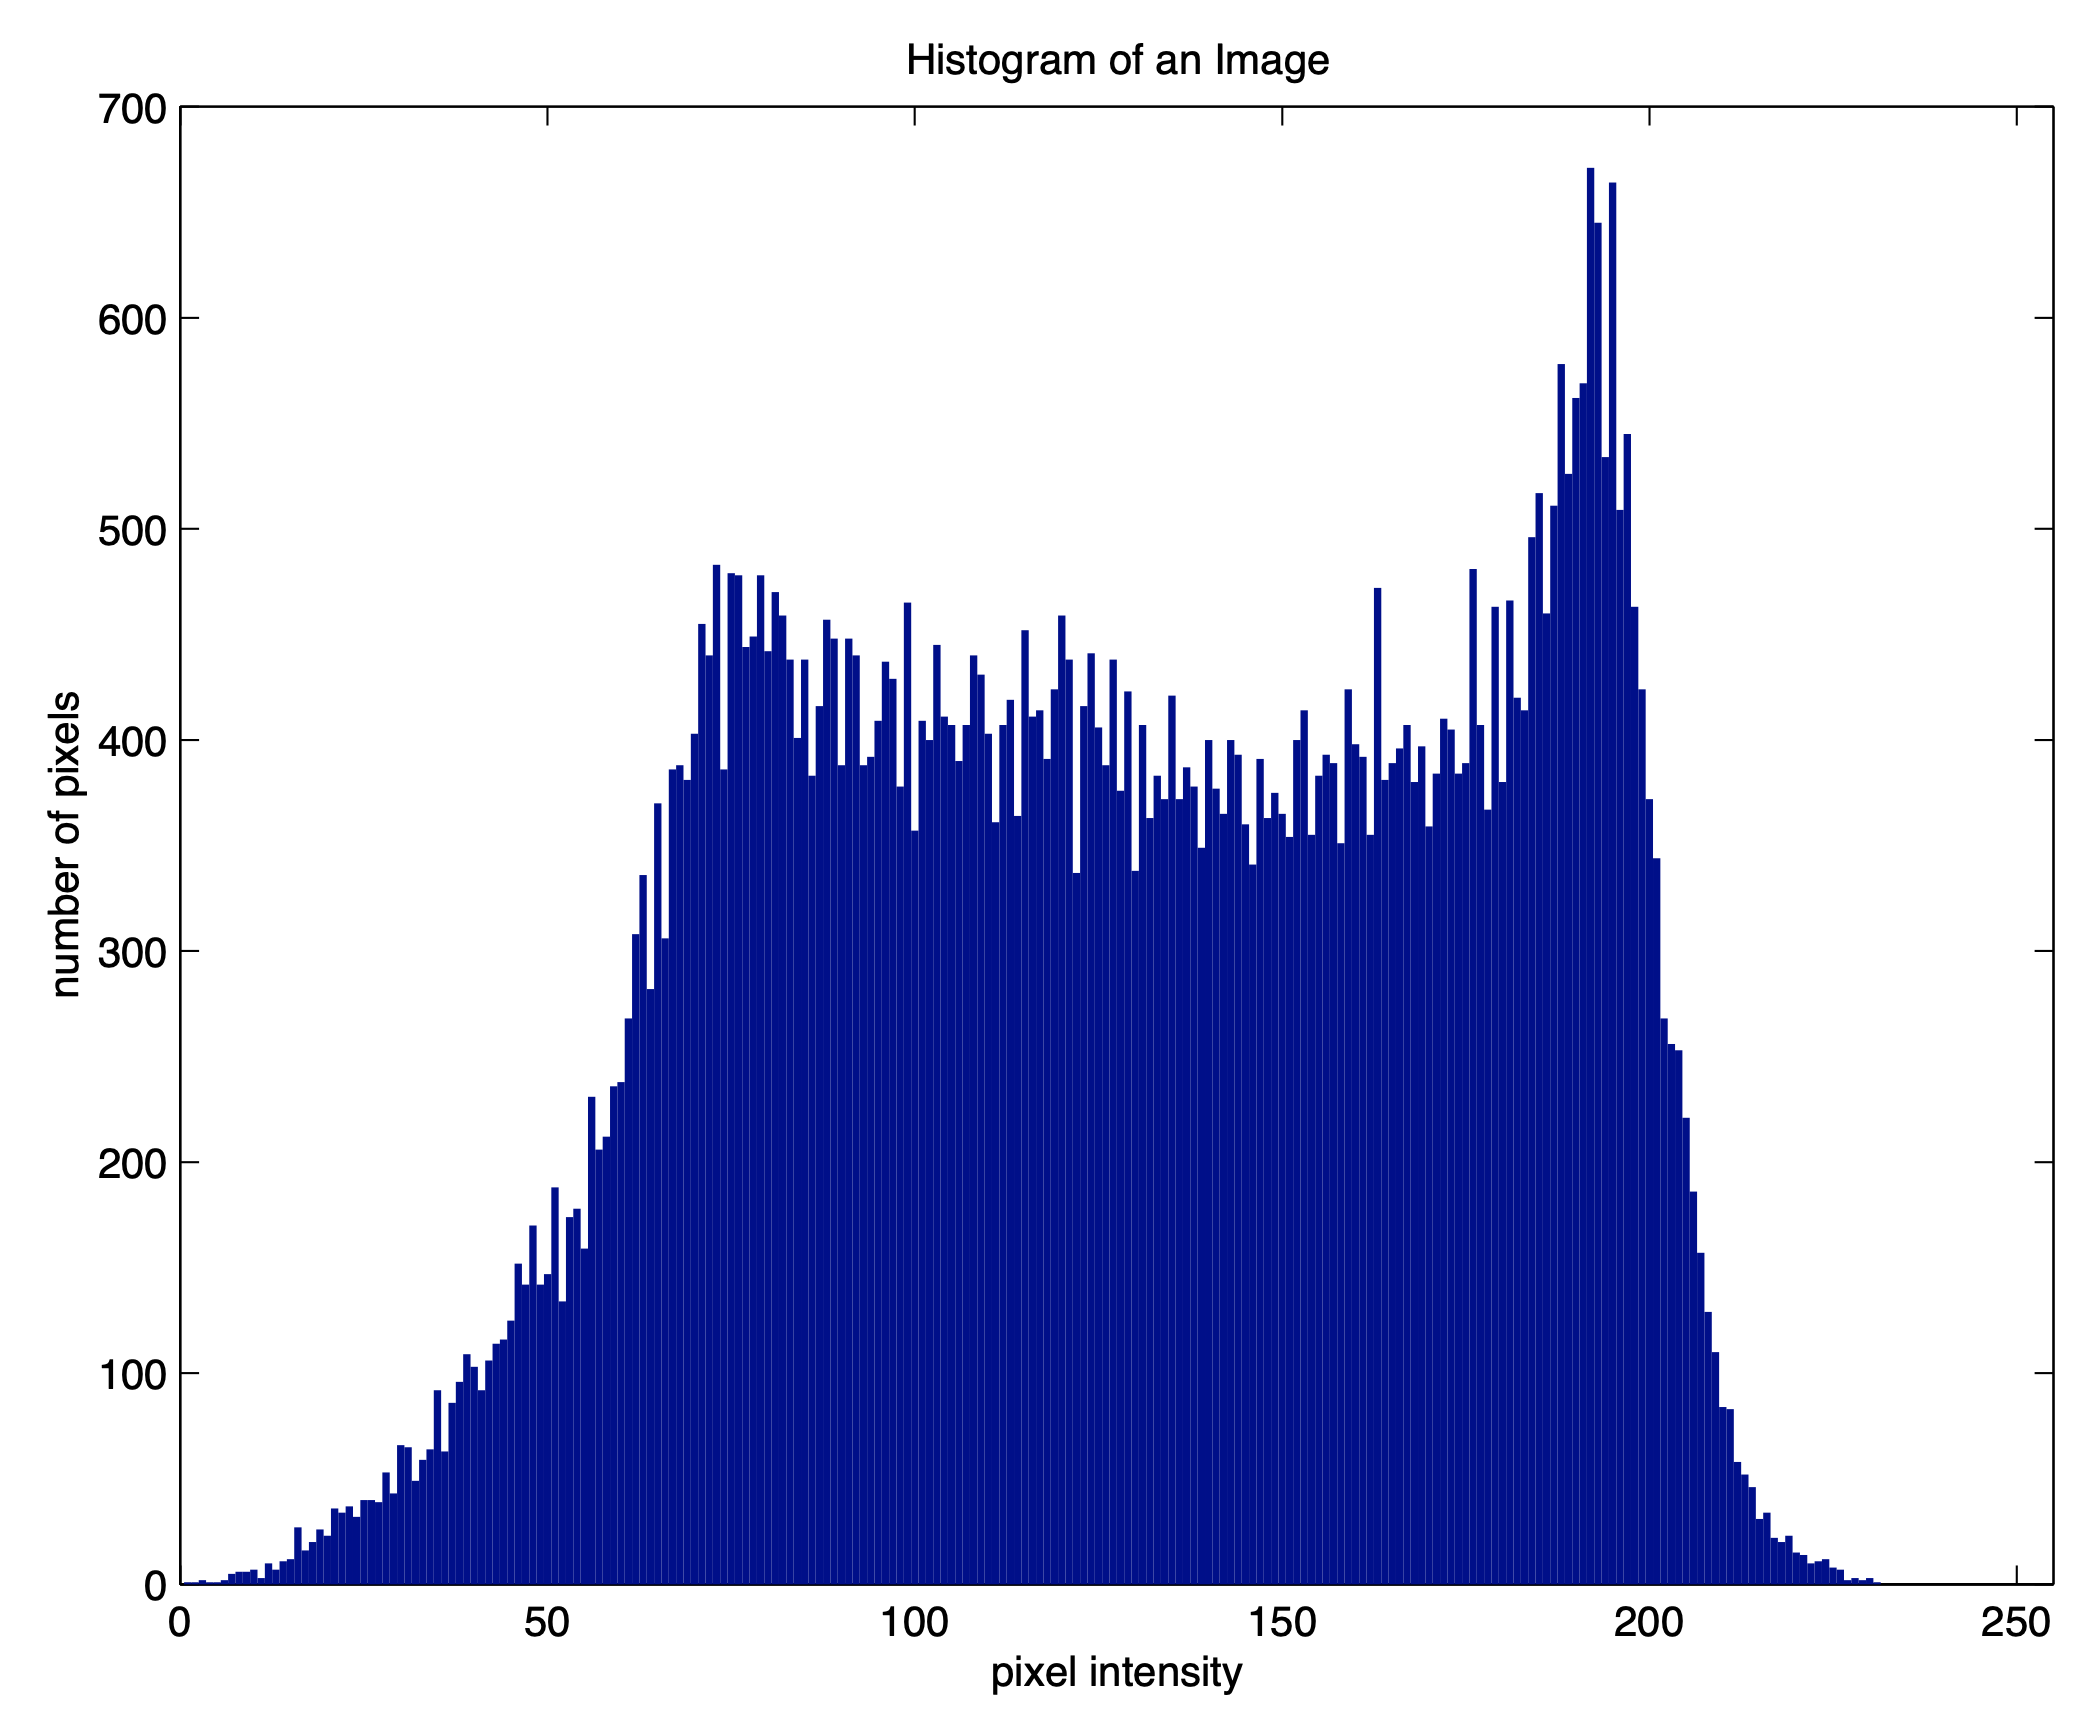
    
Figure 2: Histogram of an 8-bit image

## 3.2 Exercise: Histogram of an Image

**1. Load the grayscale image ```house.tif``` and display it.**

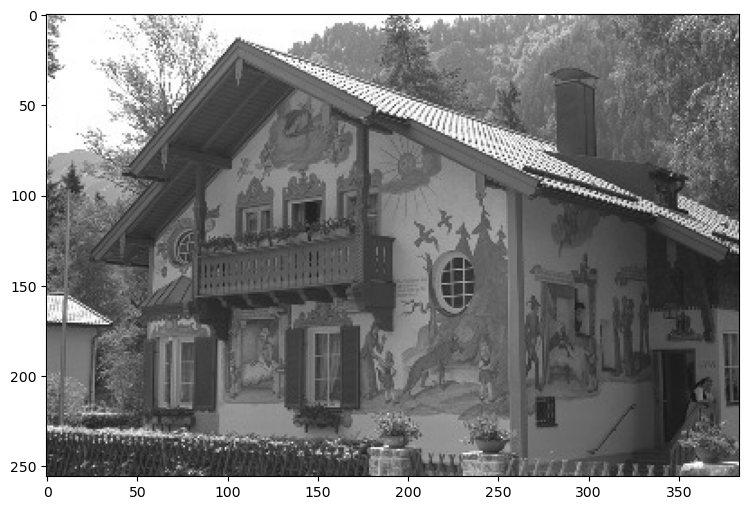

In [14]:
# insert your code here
image2 = plt.imread("house.tif")
plt.imshow(image2, cmap='gray', vmin=0, vmax=255)
plt.show()

**2. Plot the histogram of the image. Lable the axes of the histogram and give it a title.**

**Note**: You may use [`plt.hist()`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html) function. However, this function requires a vector as input. An example of using `plt.hist()` to plot a histogram of a matrix would be
```python
plt.hist(x.flatten(), bins=np.arange(256))  # flatten() reshapes the original multi-dimension array to 1D
plt.title("title")
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.show()
```

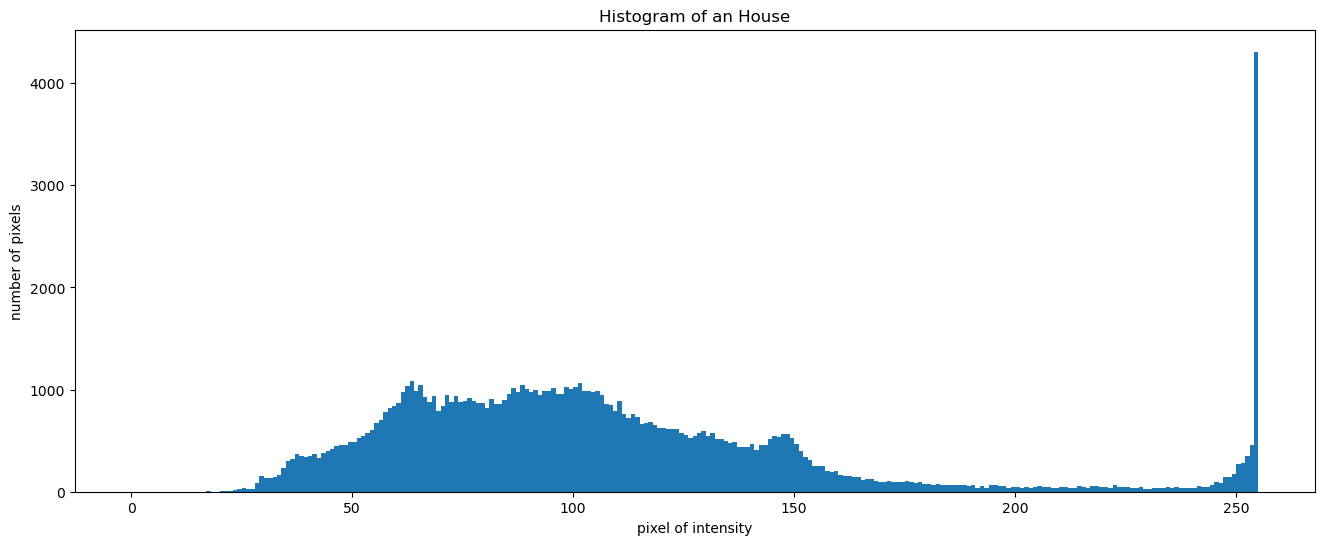

In [15]:
# insert your code here
plt.hist(image2.flatten(), bins=np.arange(256)) 
plt.title("Histogram of an House")
plt.xlabel("pixel of intensity")
plt.ylabel("number of pixels")
plt.show()

## 3.3 Pointwise Transformations

A pointwise transformation is a function that maps pixels from one intensity to another. An example is shown in Figure 3. The horizontal axis shows all possible intensities of the original image, and the vertical axis shows the intensities of the transformed image. This particular transformation maps the "darker" pixels in the range $[0, T_1]$ to a level of zero (black) and similarly maps the "lighter" pixels in $[T_2, 255]$ to white. Then, the pixels in the range $[T_1, T_2]$ are "stretched out" to use the full scale of $[0,255]$. This can have the effect of increasing the contrast in an image.

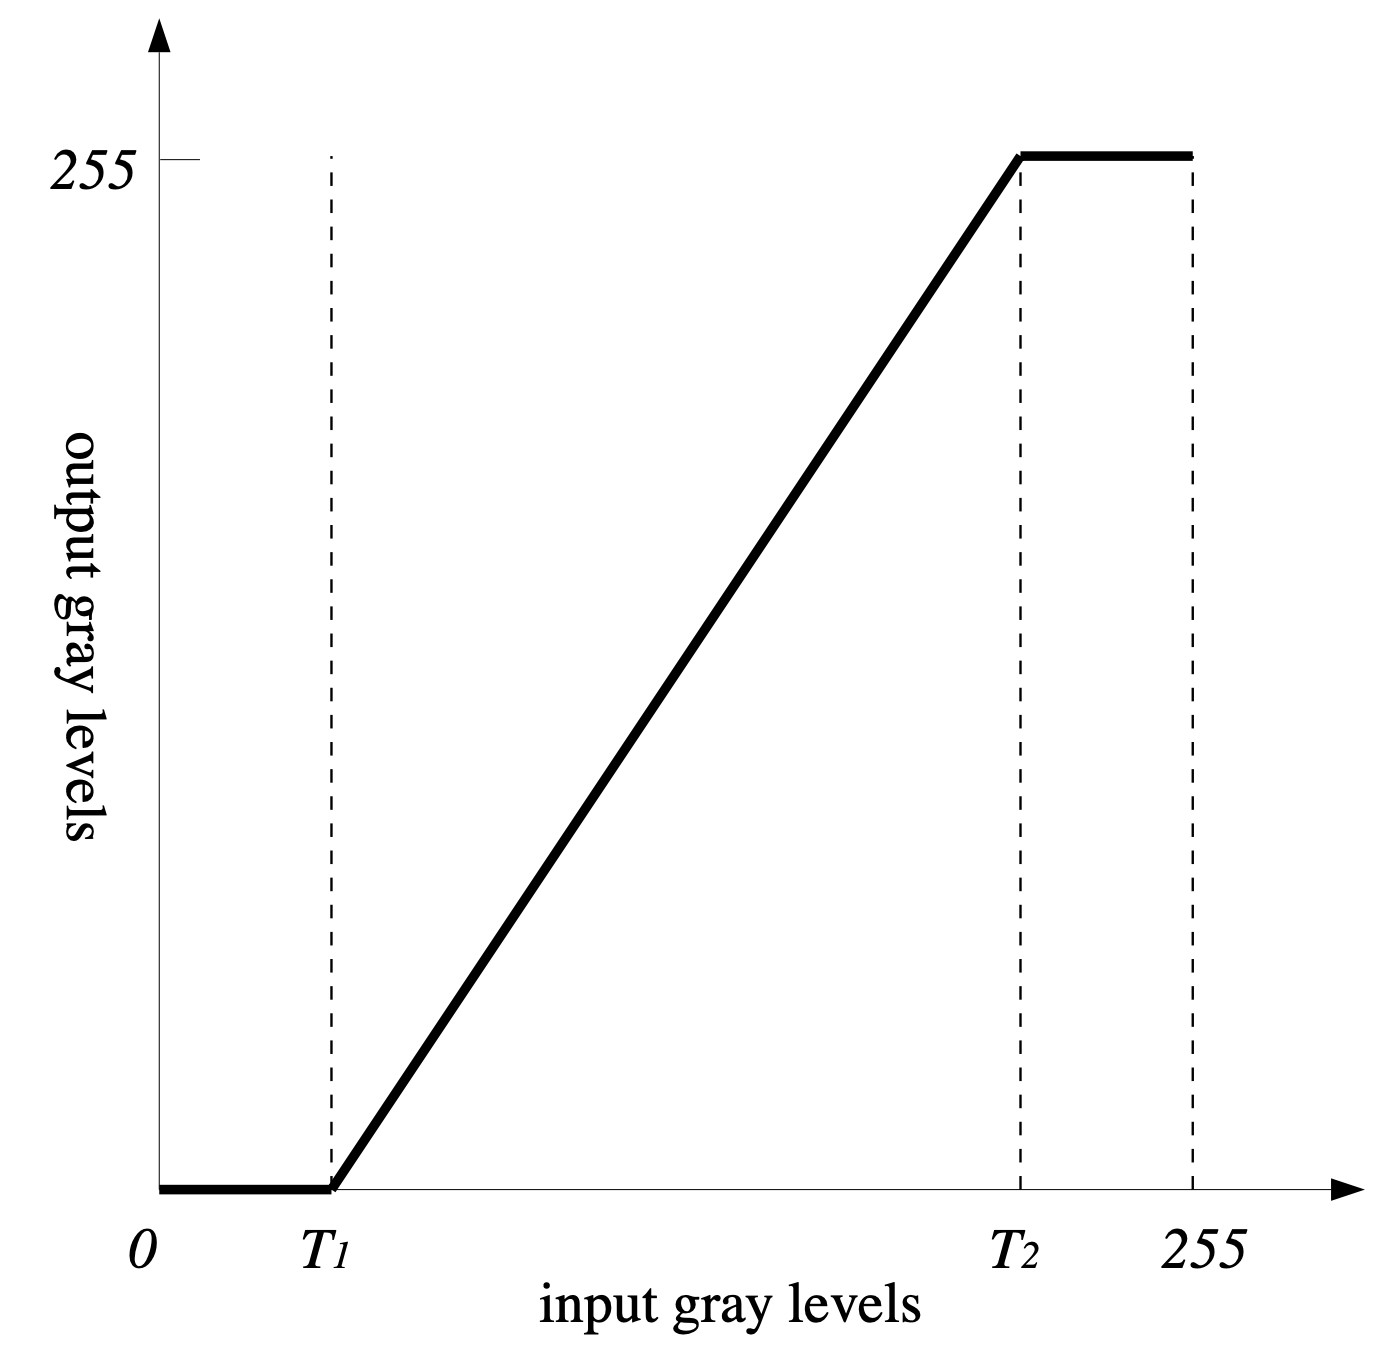

Figure 3: Pointwise transformation of an image

Pointwise transformations will obviously affect the pixel distribution, hence they will change the shape of the histogram. If a pixel transformation can be described by a one-to-one function, $y = f(x)$, then it can be shown that the input and output histograms are approximately related by
$$H_\text{out}(y) \approx \frac{ H_\text{in}(x) }{ f'(x) } \Bigg|_{x=f^{-1}(y)}$$

Since $x$ and $y$ need to be integers in this relation, the evaluation of $x = f^{-1}(y)$ needs to be rounded to the nearest integer.

The pixel transformation shown in Figure 3 is not a one-to-one function; however, the above relation still may be used to give insight into the effect of the transformation. Since the regions $[0,T_1]$ and $[T_2,255]$ map to the single points $0$ and $255$, we might expect "spikes" at the points $0$ and $255$ in the output histogram. The region $[1,254]$ of the output histogram will be directly related to the input histogram through the above relation.

First, notice from $x = f^{-1}(y)$ that the region $[1,254]$ of the output is being mapped from the region $[T_1,T_2]$ of the input. Then, notice that $f'(x)$ will be a constant scaling factor throughout the entire region of interest. Therefore, the output histogram should approximately be a stretched and rescaled version of the input histogram with possible spikes at the endpoints.

## 3.4 Exercise: Pointwise Transformations

**1. Complete the function below that will perform the pixel transformation shown in Figure 3.**

**Hints:**
* Determine an equation for the graph in Fig. 3, and use this in your function. Notice you have three input regions to consider. You may want to create a separate function to apply this equation.
* If your function performs the transformation one pixel at a time, be sure to allocate the space for the output image at the beginning to speed things up.

In [16]:
def pointTrans(x, T1, T2):
    """
    Parameters
    ---
    x: the input
    T1: the lower threshold
    T2: the upper threshold
    
    Returns
    ---
    y: the output
    """
    if (x >= 0 and x <= T1):
        y = 0;
    elif (x > T1 and x <= T2):
        y = (255 / (T2 - T1)) * x - ((255 * T1) / (T2 - T1))
    else:
        y = 255
    
    #y = None #asking about this
    return y

**2. Load the image file ```narrow.tif```. Display the image and its histogram.**

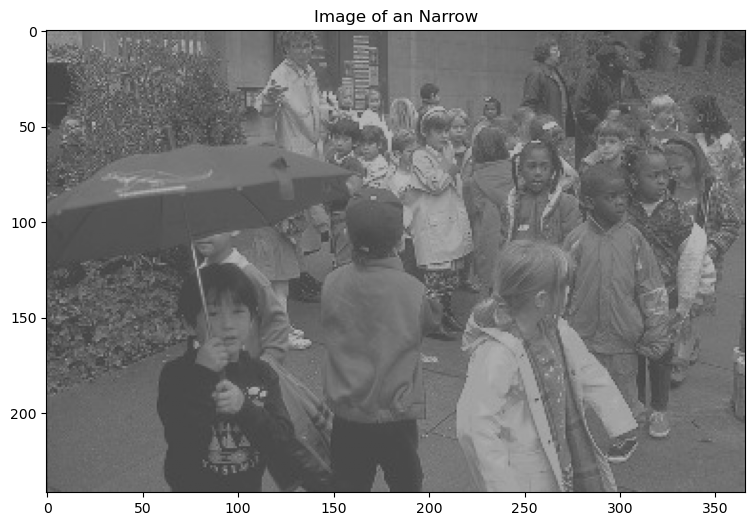

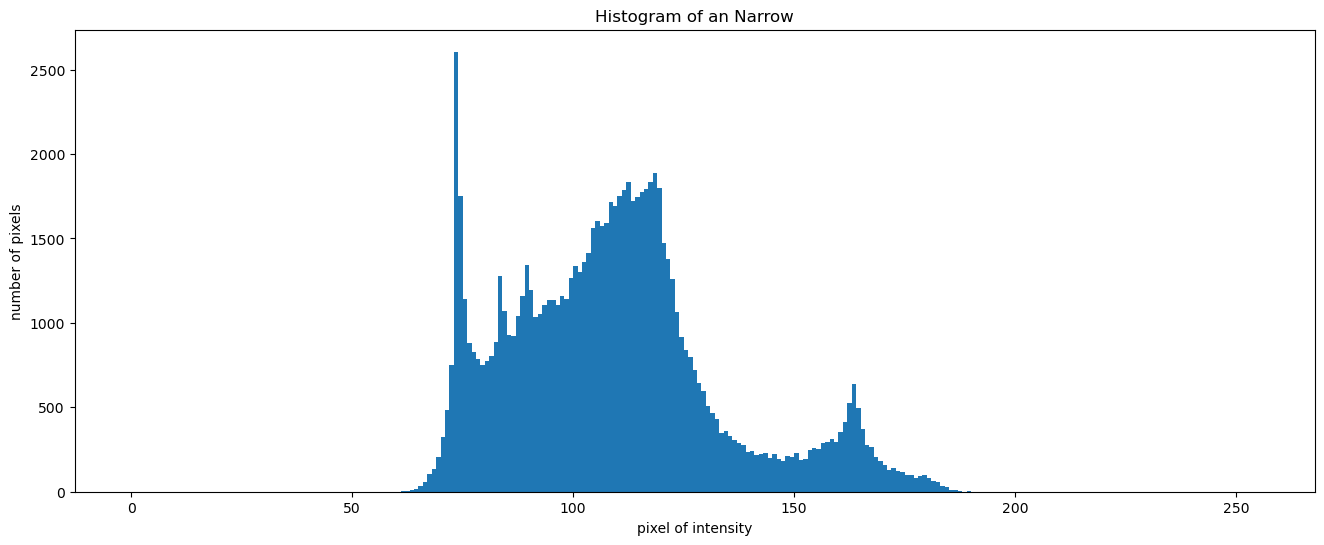

In [17]:
# insert your code here
image3 = plt.imread("narrow.tif")
plt.imshow(image3, cmap='gray', vmin=0, vmax=255)
plt.title("Image of an Narrow")
plt.show()

plt.hist(image3.flatten(), bins=np.arange(256))
plt.title("Histogram of an Narrow")
plt.xlabel("pixel of intensity")
plt.ylabel("number of pixels")
plt.show()


**3. Use your ```pointTrans()``` function to spread out the histogram using ```T1 = 70``` and ```T2 = 180```. Display the new image and its histogram.**

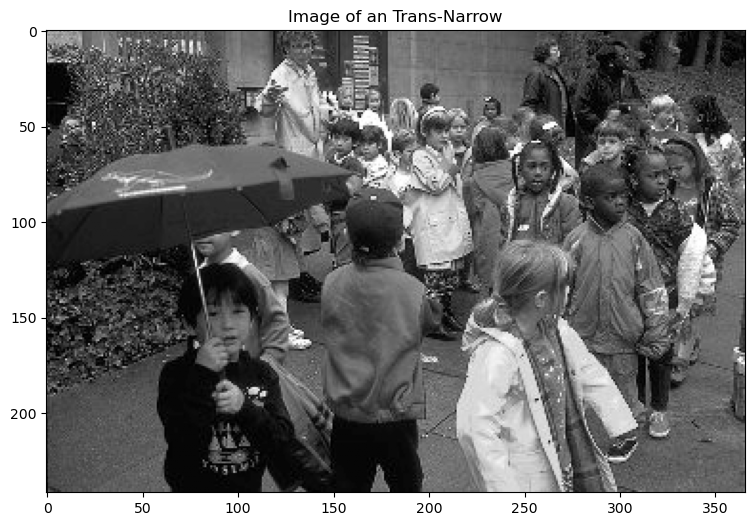

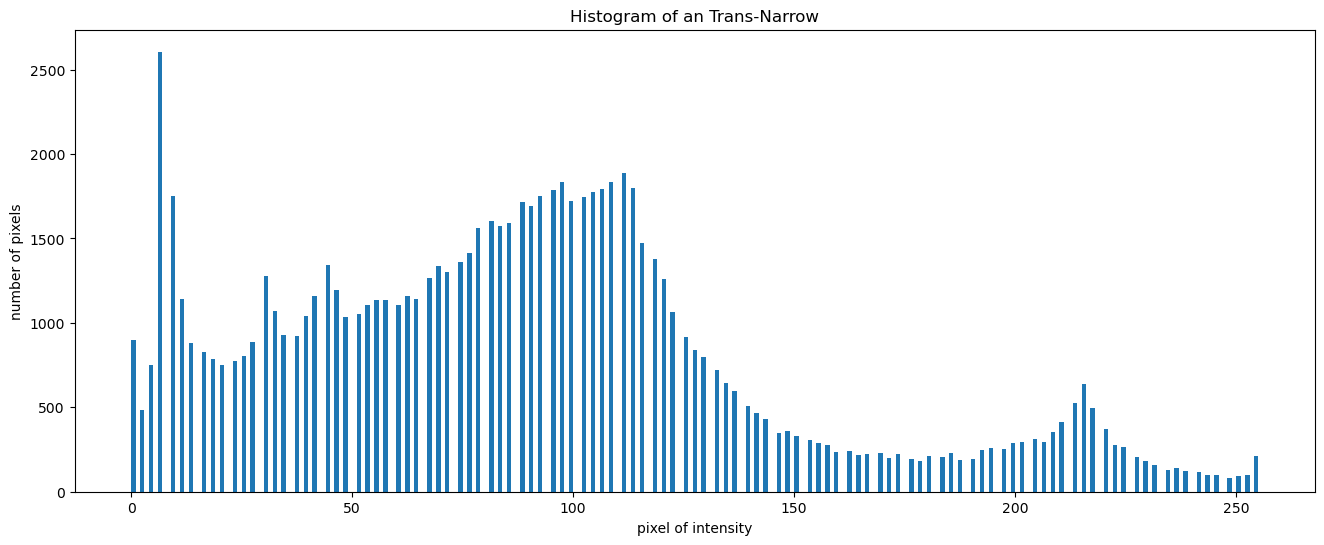

In [18]:
# insert your code here
# Run entire array of the image and take out the gray scale
# change certain level range 70 to 180 to function

I, J = image3.shape #checking this entire code with image and historgram
trans_out = np.zeros((I,J))
for i in range (I):
    for j in range(J):
        gray_scale = image3[i,j]
        trans_out[i,j] = pointTrans(gray_scale, 70, 180)
plt.imshow(trans_out, cmap='gray', vmin=0, vmax=255)
plt.title("Image of an Trans-Narrow")
plt.show()

plt.hist(trans_out.flatten(), bins=np.arange(256))
plt.title("Histogram of an Trans-Narrow")
plt.xlabel("pixel of intensity")
plt.ylabel("number of pixels")
plt.show()

**4. What qualitative effect did the transformation have on the original image? Do you observe any negative effects of the transformation?**

The most noticeable qualitative effect after the transformation is the increase in contrast. In this transformation, all pixel values below 70 and above 180 are clipped, while values between 70 and 180 are stretched to span the full range from 0 to 255. As shown in the “Transformed Narrow” image, the result is a more contrast-enhanced distribution between black and white.
As a negative effect, some image details are lost. Specifically, fine grayscale details in very dark and very bright regions are removed due to clipping. In the image, details in extremely dark or white areas are no longer visible.

**5. Compare the histograms of the original and transformed images. Why are there zeros in the output histogram?**

One outstanding difference between the two histograms is the amount of spreading. After the transformation, the pixel intensities are stretched to span the full range from 0 to 255. However, this also results in zero-valued outputs for some pixels because values outside the specified range are clipped. In addition, the pixel values are rounded to integers, which further contributes to gaps in the histogram.

# 4. Gamma Correction
The light intensity generated by a physical device is usually a nonlinear function of the original signal. For example, a pixel that has a gray level of 200 will not be twice as bright as a pixel with a level of 100. Almost all computer monitors have a power law response to their applied voltage. For a typical cathode ray tube (CRT), the brightness of the illuminated phosphors is approximately equal to the applied voltage raised to a power of 2.5. The numerical value of the exponent is known as the gamma ($\gamma$) of the CRT. Therefore, the power law is expressed as
$$I = V^\gamma$$
where $I$ is the pixel intensity and $V$ is the voltage applied to the device.

If we apply this relation to the pixel values for an 8-bit image, we obtain the following relationship:
$$y = 255 \left(\frac{x}{255}\right)^\gamma$$
where $x$ is the original pixel value, and $y$ is the pixel intensity as it appears on the display. This relationship is illustrated in Figure 4.

In order to achieve the correct reproduction of intensity, this nonlinearity must be compensated by a process known as gamma correction. Images that are not properly corrected usually appear too light or too dark. If the value of $\gamma$ is available, then the correction process consists of applying the inverse of the above equation. This is a straightforward pixel transformation as discussed in Section 3.2.

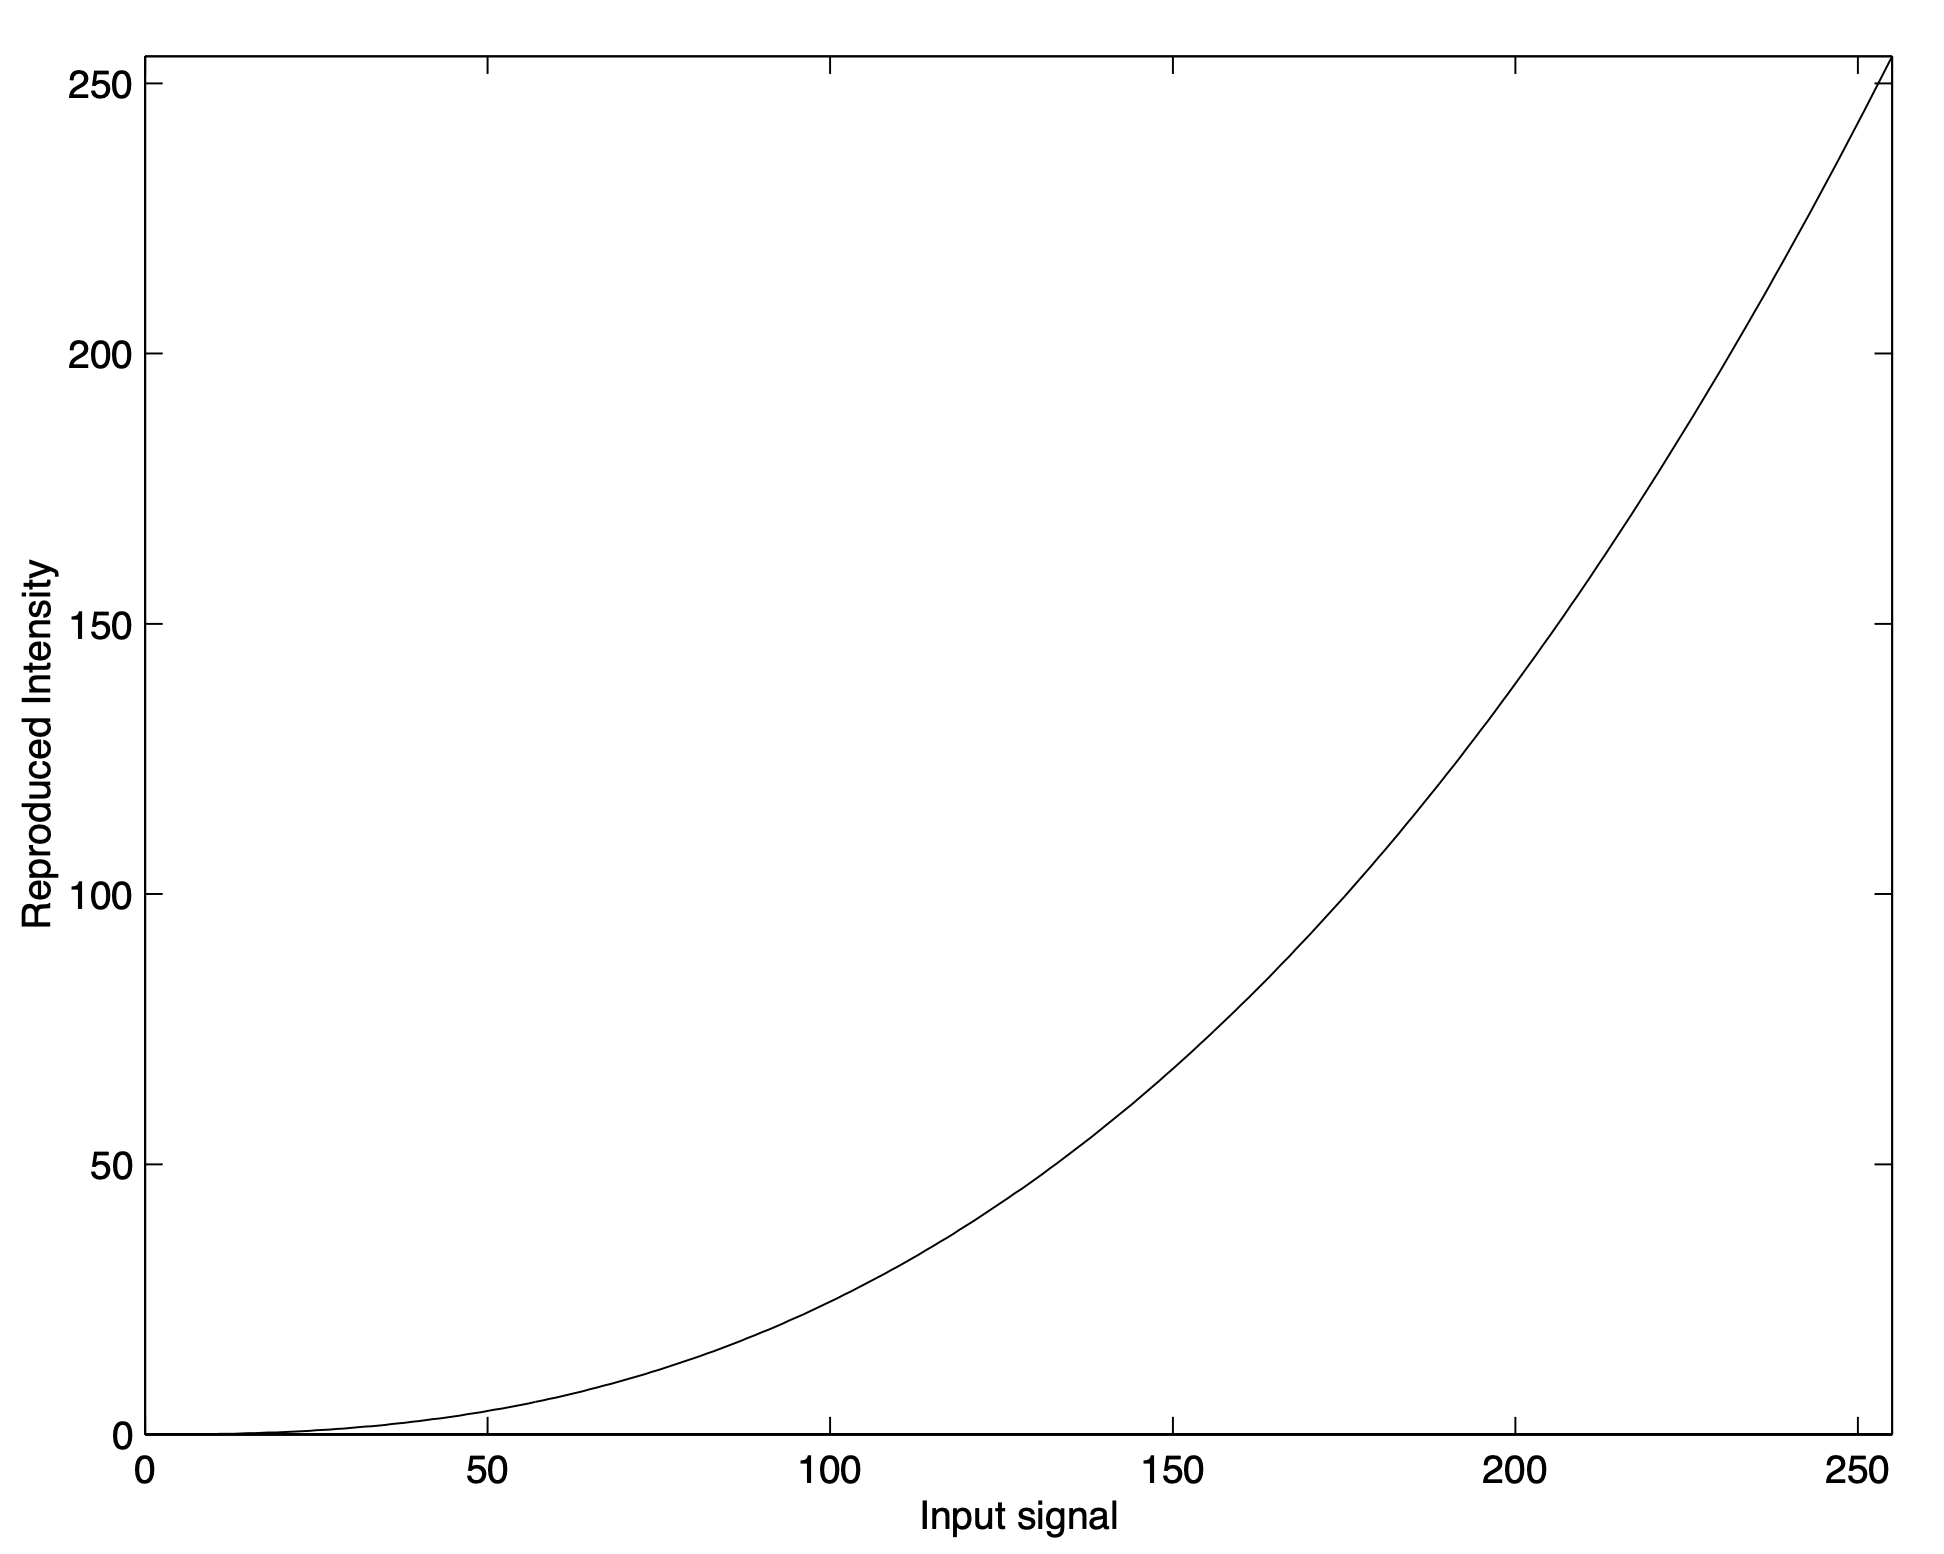

Figure 4: Nonlinear behavior of a display device having a gamma of 2.2

<h3 style="color:red;"><left>Exercise 4.1: Gamma($\gamma$) Correction</left></h3>

**1. Complete the function below that will $\gamma$ correct an image by applying the inverse of equation (5).**

In [19]:
def gammCorr(A, gamma):
    """
    Parameters
    ---
    A: the uncorrected image
    gamma: the gamma of the device
    
    Returns
    ---
    the corrected image
    """
    # does image return as uint? do we need to change A to float and compute and back to int?
    A = A.astype(float)                    
    B = 255 * ((A / 255) ** (1 / gamma))    
    B = np.clip(B, a_min = 0, a_max = 255)               
    B = B.astype(np.uint8)      
    # B = None # why do we need this
    return B

**2. Load the image file ```dark.tif```, which is an image that has not been $\gamma$ corrected for your monitor. Display it and observe the quality of the image.**

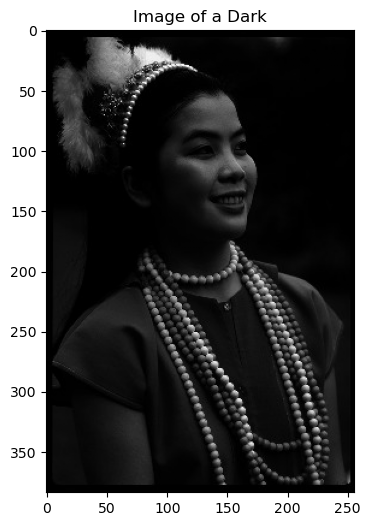

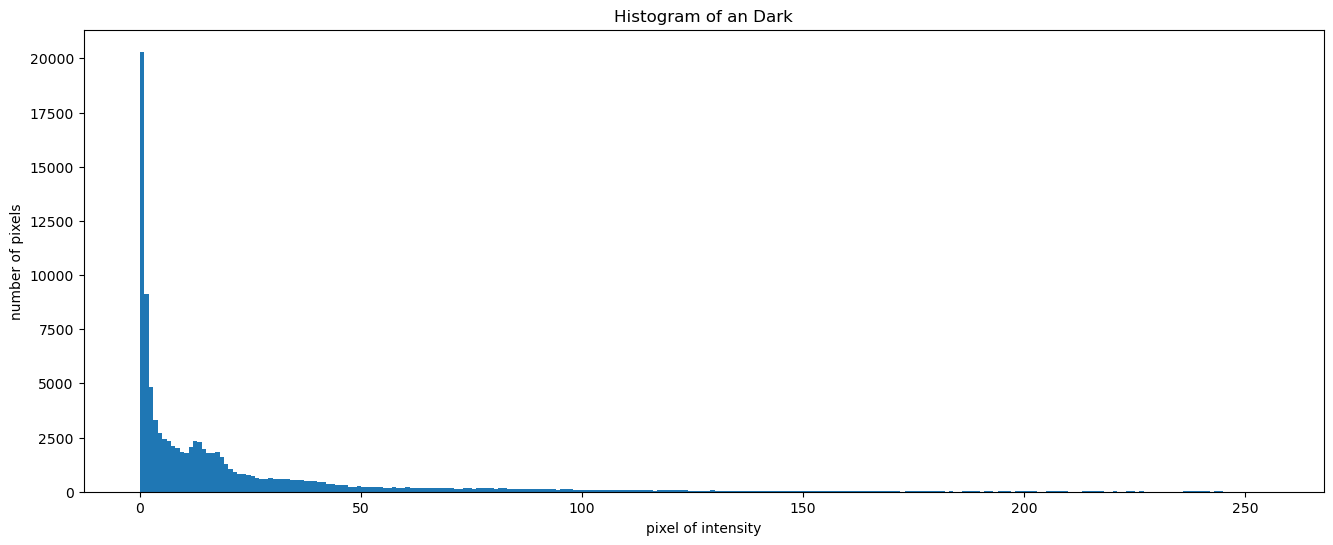

In [20]:
# insert your code here
image4 = plt.imread("dark.tif")
plt.imshow(image4, cmap='gray', vmin=0, vmax=255)
plt.title("Image of a Dark")
plt.show()

plt.hist(image4.flatten(), bins=np.arange(256))
plt.title("Histogram of an Dark")
plt.xlabel("pixel of intensity")
plt.ylabel("number of pixels")
plt.show()

**3. Assume that the $\gamma$ for your monitor is $2.2$. Use your ```gammCorr()``` function to correct the
image for your monitor, and display the resultant image.**

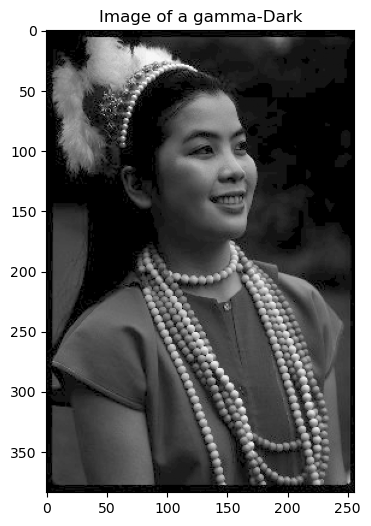

In [21]:
# insert your code here

image_gamma = gammCorr(image4, 2.2)
plt.imshow(image_gamma, cmap='gray', vmin=0, vmax=255)
plt.title("Image of a gamma-Dark")
plt.show() # make sure this looks fine

**4. How did the correction affect the image? Does this appear to be the correct value for $\gamma$?**

Applying the given gamma makes the dark pixels significantly brighter, enhancing details in shadowed regions. After gamma correction, the overall image becomes more visible and perceptually balanced on the display.

# 5. Color Images
## 5.1 Background on Color
Color is a perceptual phenomenon related to the human response to different wavelengths of light, primarily in the region of $400$ to $700$ nanometers (nm). The perception of color arises from the sensitivities of three types of neurochemical sensors in the retina known as the long ($L$), medium ($M$), and short ($S$) cones. The response of these sensors to photons is shown in Figure 5. Note that each cone responds to a range of wavelengths.

Because of this property of the human visual system, we can model all colors as combinations of the three primary color components: red ($R$), green ($G$), and blue ($B$). For the purpose of standardization, the Commission International de l'Eclairage (CIE) has designated the following wavelength values for the three primary colors: `blue = 435.8 nm, green = 546.1 nm, red = 700 nm$.

The relative amounts of the three primary colors of light required to produce a color of a given wavelength are called *tristimulus values*. Figure 6 shows a plot of tristimulus values using the CIE primary colors. Notice that some of the tristimulus values are negative, which indicates that colors at those wavelengths cannot be reproduced by the CIE primary colors.

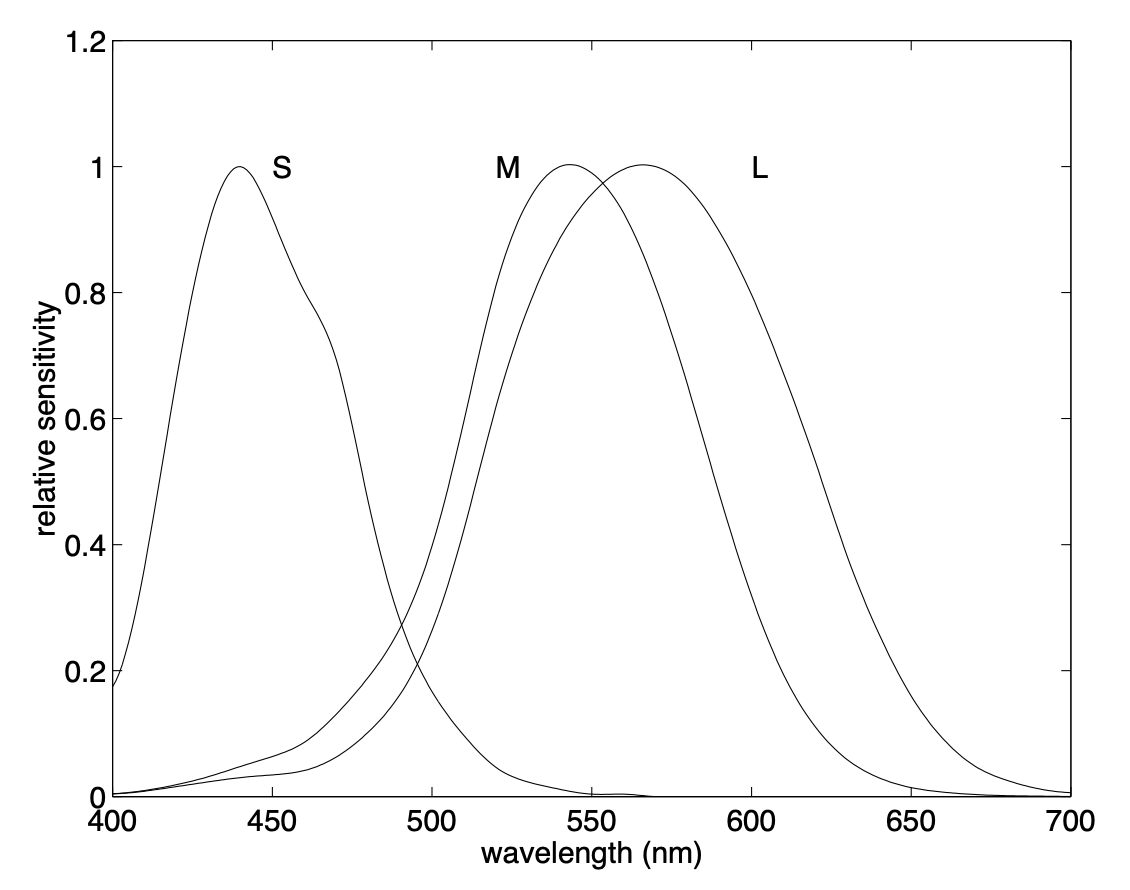

Figure 5: Relative photon sensitivity of long, medium, and short cones

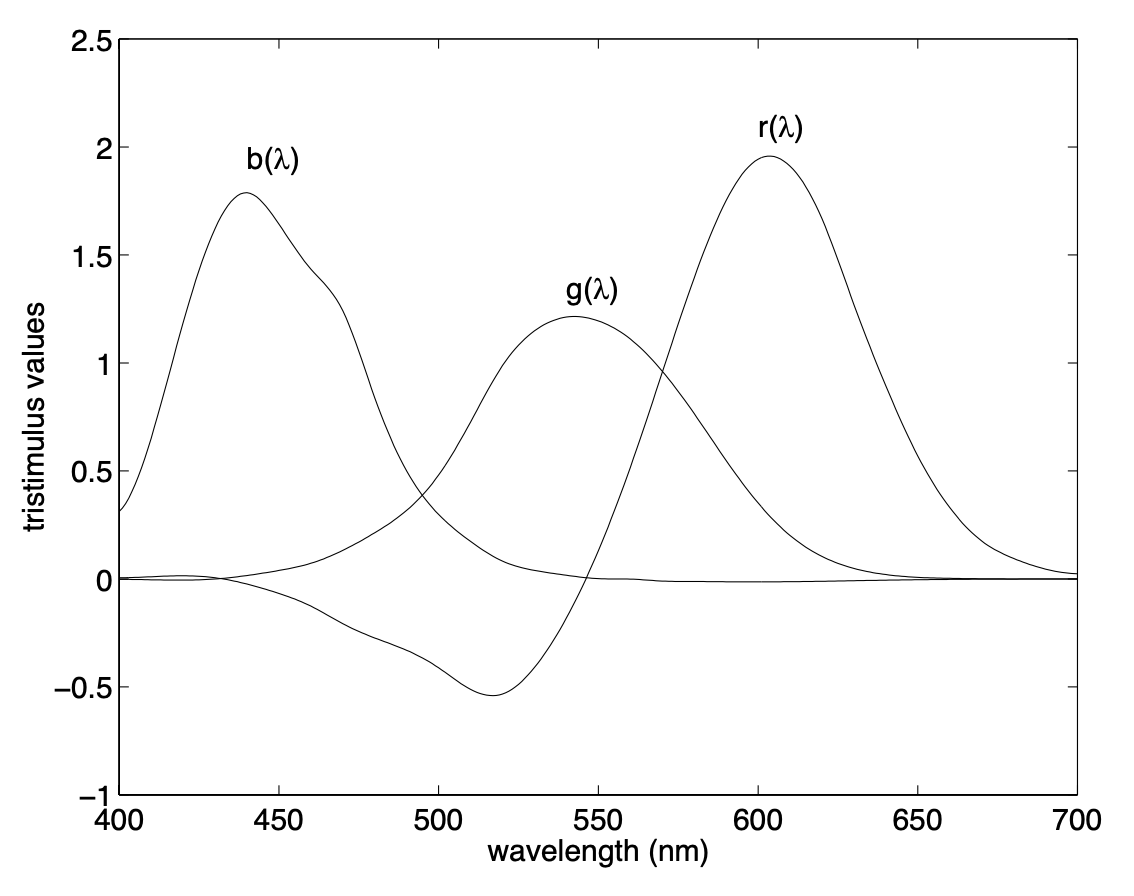

Figure 6: Plot of tristimulus values using CIE primary colors

## 5.2 Color Spaces
A color space allows us to represent all the colors perceived by human beings. We previously noted that weighted combinations of stimuli at three wavelengths are sufficient to describe all the colors we perceive. These wavelengths form a natural basis or coordinate system, from which the color measurement process can be described. In this lab, we will examine two common color space: $RGB$ and $YC_bC_r$. For more information, see to Reference 1.
- $RGB$ space is one of the most popular color spaces and is based on the tristimulus theory of human vision as described above. The RGB space is a hardware-oriented model and is thus primarily used in computer monitors and other raster devices. Based upon this color space, each pixel of a digital color image has three components: red, green, blue.
- $YC_bC_r$ space is another important color space model. This is a gamma-corrected space defined by the International Radio Consultative Committee (IRCC) that is mainly used in the digital video paradigm. This space consists of luminance ($Y$) and chrominance ($C_bC_r$) components. The importance of the $YC_bC_r$ space comes from the fact that the human visual system perceives a color stimulus in terms of luminance and chrominance attributes, rather than in terms of $R$, $G$, and $B$ values. The relation between $YC_bC_r$ space and gamma-corrected $RGB$ space is given by the following linear transformation:

$$
\begin{align}
    Y   & = 0.299 R + 0.587 G + 0.114 B \\
    C_b & = 0.564(B-Y) + 128 \\
    C_r & = 0.713(R-Y) + 128
\end{align}
$$

In $YC_bC_r$, the luminance parameter is related to an overall intensity of the image. The chrominance components are a measure of the relative intensities of the blue and red components. The inverse of the transformation is easily shown to be:

$$
\begin{align}
    R & = Y + 1.4025(C_r - 128) \\
    G & = Y - 0.3443(C_b - 128) - 0.7144(C_r - 128) \\
    B & = Y + 1.7730(C_b - 128)
\end{align}
$$

## 5.3 Exercise: Color

**1. Load the image file ```girl.tif```. Check the size of array for this image by using the command ```print(image.shape)```, where ```image``` is the image matrix. Also, print the data type of this matrix.** 

Notice that this is a three dimensional array of type ```uint8```. It contains three gray scale image planes corresponding to the red, green, and blue components for each pixel. Since each color pixel is represented by three bytes, this is commonly known as a 24-bit image.

In [22]:
# insert your code here
image5 = plt.imread("girl.tif")
print(image5.shape)
image5.dtype

(256, 384, 3)


dtype('uint8')

**2. Display the image. Note that ```cmap```, ```vmin```, ```vmax``` arguments are not needed for color images.**

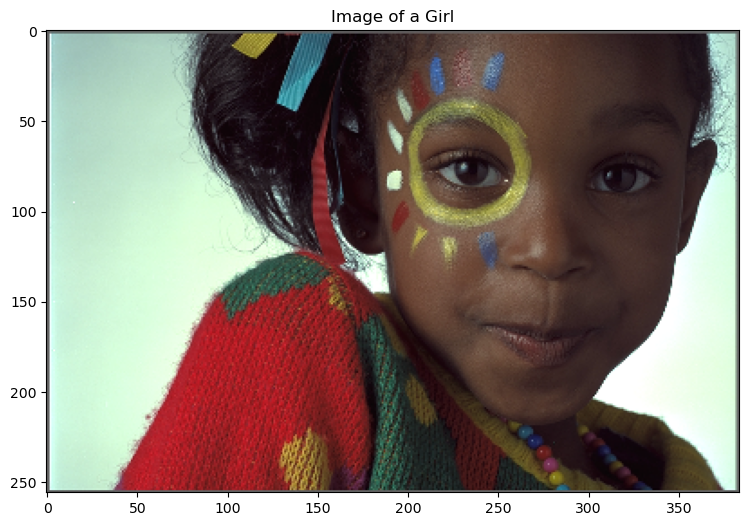

In [23]:
# insert your code here
plt.imshow(image5)
plt.title("Image of a Girl")
plt.show() # why does it mention about vmin, vmax, cmap?

**3. Extract each of the color components, then plot each color component.**

Note that while the original is a color image, each color component separately is a monochrome image, so plotting each color component requires ```cmap```, ```vmin```, ```vmax``` arguments.

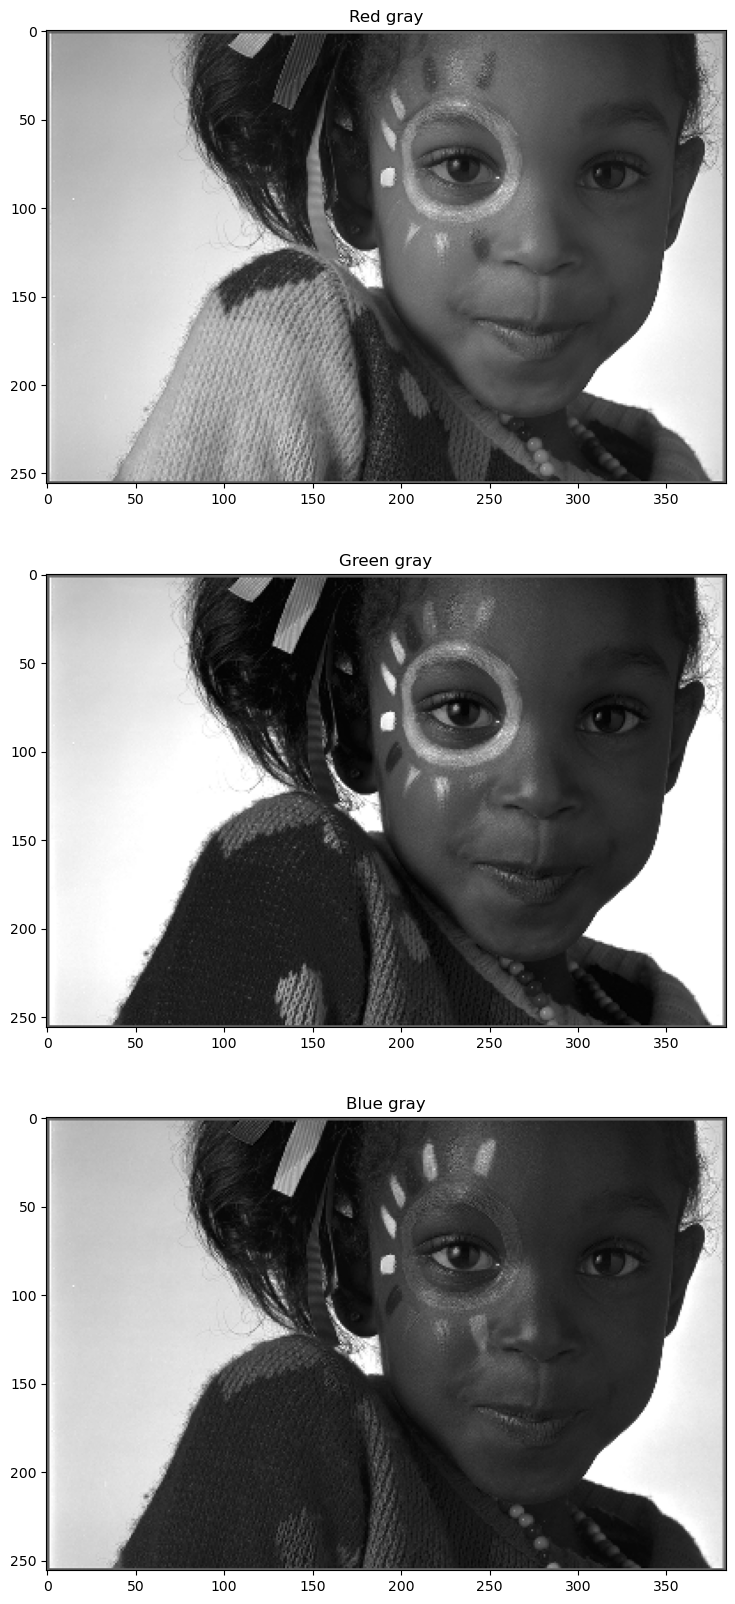

In [24]:
# insert your code here
red = image5[:,:,0] # This selects all the red intensities at all pixels
green = image5[:,:,1]
blue = image5[:,:,2]

plt.figure(figsize=(40,20))
plt.subplot(3,1,1)
plt.imshow(red, cmap="gray", vmin=0, vmax=255)
plt.title("Red gray")

plt.subplot(3,1,2)
plt.imshow(green, cmap="gray", vmin=0, vmax=255)
plt.title("Green gray")

plt.subplot(3,1,3)
plt.imshow(blue, cmap="gray", vmin=0, vmax=255)
plt.title("Blue gray")
plt.show()

#I found each color part is brightest need to make sure

**4. Load the files ```ycbcr.npy``` using [`np.load()`](https://numpy.org/doc/stable/reference/generated/numpy.load.html), and print its type and data shape `dtype`.**

This file contains a NumPy array for a color image in $YC_bC_r$ format. The array contains three gray scale image planes that correspond to the luminance ($Y$) and two chrominance ($C_bC_r$) components.

In [25]:
# insert your code here
image6 = np.load("ycbcr.npy")
print(type(image6))
image6.dtype

<class 'numpy.ndarray'>


dtype('uint8')

**5. Plot each of the components.**

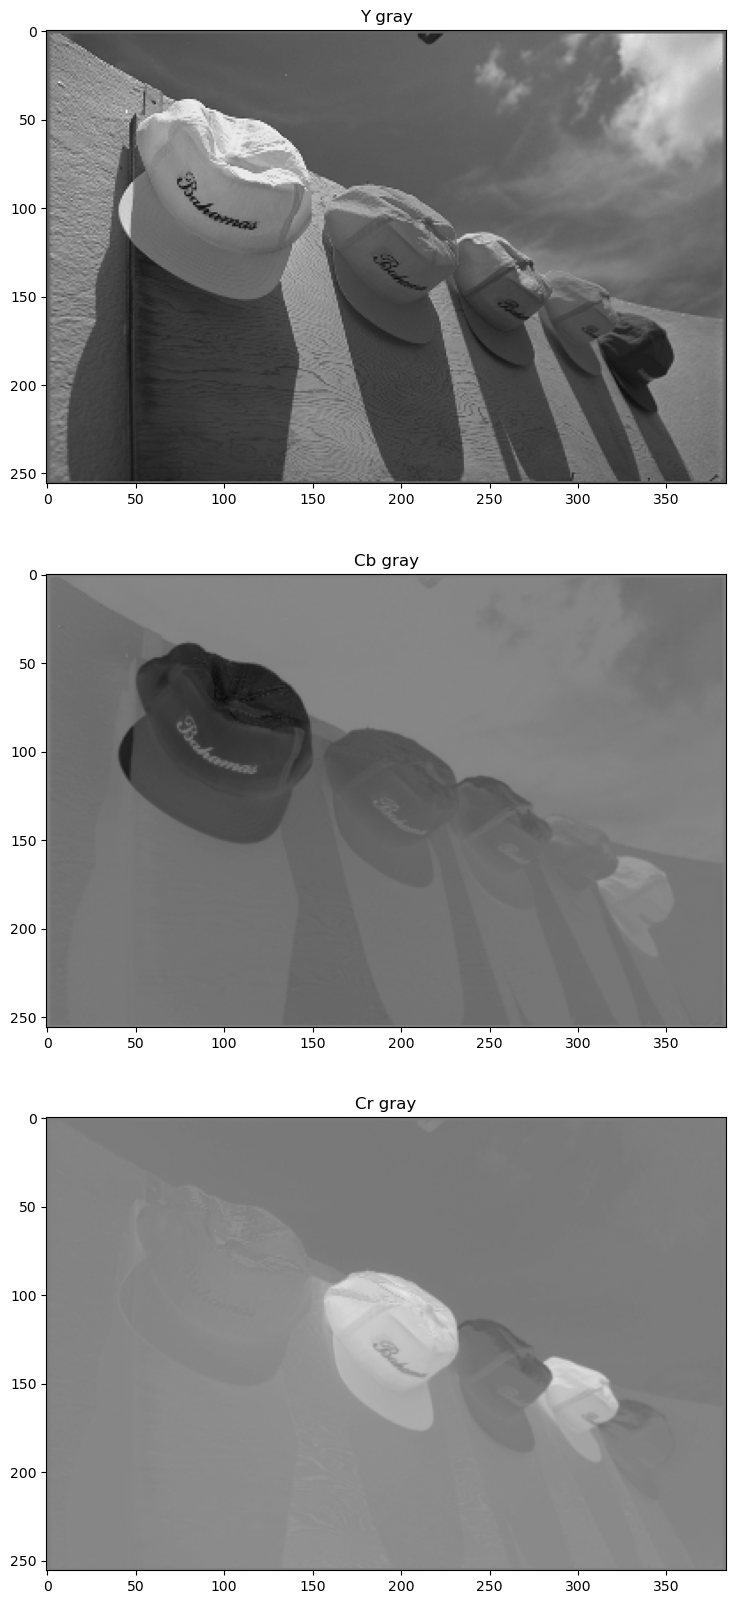

In [26]:
# insert your code here
Y = image6[:,:,0]
Cb = image6[:,:,1]
Cr = image6[:,:,2]

plt.figure(figsize=(40,20))
plt.subplot(3,1,1)
plt.imshow(Y, cmap="gray", vmin=0, vmax=255)
plt.title("Y gray")

plt.subplot(3,1,2)
plt.imshow(Cb, cmap="gray", vmin=0, vmax=255)
plt.title("Cb gray")

plt.subplot(3,1,3)
plt.imshow(Cr, cmap="gray", vmin=0, vmax=255)
plt.title("Cr gray")
plt.show()

**6. Complete the function below that will perform the transformation from $YC_bC_r$ to $RGB$. It should accept a 3-D $YC_bC_r$ image array as input, and return a 3-D $RGB$ image array.**

* Make sure `ycbcr` is in `double` or `float` before any processing.
* After conversion, to make sure the values of `rgb` are in $[0,255]$, use [`np.clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html).

In [27]:
def ycbcr2rgb(ycbcr):
    """
    Parameters
    ---
    ycbcr: image in YCbCr
    
    Returns
    ---
    rgb: image RGB
    """
    ycbcr = ycbcr.astype(float)
    Y = ycbcr[:,:,0]
    cb = ycbcr[:,:,1]
    cr = ycbcr[:,:,2]
    
    R = Y + 1.4025*(cr - 128)
    G = Y - 0.3443*(cb - 128) - 0.7144*(cr - 128)
    B = Y + 1.7730*(cb - 128)
    
    RGB = np.stack((R,G,B), axis=2) # How does it exactly work?
    rgb = np.clip(RGB, a_min = 0, a_max = 255)

    #rgb = None
    return rgb

**7. Now, convert the ycbcr array to an RGB representation and display the color image.**

* Before displaying the image, make sure its data type is `np.uint8`.

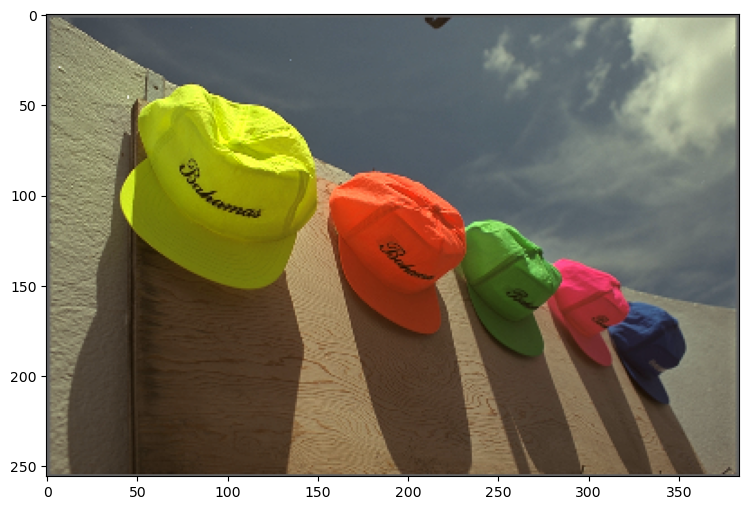

In [28]:
# insert your code here
trans_rgb = ycbcr2rgb(image6)
trans_rgb = np.array(trans_rgb, dtype=np.uint8)
plt.imshow(trans_rgb)